### 딥-러닝 과정 MLP 

## Keras 모델 생성/학습 - 보스턴 집값 예측 모델

![](https://3qeqpr26caki16dnhd19sv6by6v-wpengine.netdna-ssl.com/wp-content/uploads/2016/06/Regression-Tutorial-with-Keras-Deep-Learning-Library-in-Python.jpg)

* CRIM: per capita crime rate by town  
* ZN: proportion of residential land zoned for lots over 25,000 sq.ft.
* INDUS: proportion of non-retail business acres per town.
* CHAS: Charles River dummy variable (1 if tract bounds river; 0 otherwise)
* NOX: nitric oxides concentration (parts per 10 million)
* RM: average number of rooms per dwelling
* AGE: proportion of owner-occupied units built prior to 1940
* DIS: weighted distances to five Boston employment centres
* RAD: index of accessibility to radial highways
* TAX: full-value property-tax rate per \$10,000
* PTRATIO: pupil-teacher ratio by town
* B: 1000(Bk — 0.63)² where Bk is the proportion of blacks by town
* LSTAT: % lower status of the population
* MEDV: Median value of owner-occupied homes in $1000’s

In [1]:
# 1. 데이터 불러오기
import pandas as pd
df = pd.read_csv('BostonHousingData.csv')
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [2]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [3]:
# 1-1. 데이터 살펴보기
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [4]:
# !pip install seaborn


In [5]:
# !pip install matplotlib

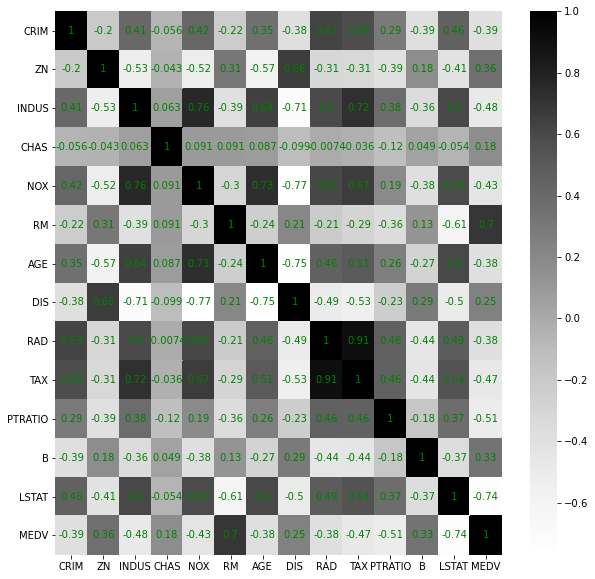

In [6]:
# 1-2 데이터 상관관계 확인
import seaborn as sns
import matplotlib.pyplot as plt

corr_df = df.corr()
plt.figure(figsize = (10,10))
sns.heatmap(corr_df, annot=True, annot_kws=dict(color='g'), cmap='Greys')

plt.show()

In [7]:
# 1-3 x/y분리 (feature selection)
x = df.iloc[:, :13]
y = df.iloc[:, 13:]

In [8]:
# train / test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state = 321)

#validation set's added.
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size = 0.5, random_state = 321)

In [9]:
# # 2. Data 정규화 #하는 방법이 다 다르구나..
#언제 정규화? 언제 표준화?
from sklearn.preprocessing import MinMaxScaler

transform = MinMaxScaler()

transform.fit(X_train) # 훈련데이터를 기반으로 업데이트를 시킨다.
X_train = transform.transform(X_train)
X_test =  transform.transform(X_test)
X_val = transform.transform(X_val)
# 왜 한번에 안해줄까? 평가될 데이터가 들어 있으면 데이터의 leaking 현상발생 전체분포로 스케일링하면 안된다.분포의 예측가능성이 생긴다.

In [10]:
# 3. MLP 모델 생성
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense, Dropout




In [21]:
model = keras.Sequential()
model.add(Dense(input_dim = 13, units = 164, activation='relu'))
model.add(Dense(units = 128, activation='relu'))
model.add(Dense(units = 64, activation='relu'))
model.add(Dense(units = 32, activation='relu'))
model.add(Dense(units = 16, activation='relu'))
model.add(Dense(units = 8, activation='relu'))
#model.add(Dense(units = 1, activation='relu'))
model.add(Dense(units = 1, activation='linear'))


In [22]:
# 4. Compile - Optimizer, Loss function 설정
model.compile(loss = 'mse', optimizer='adam', metrics=['mae'])

In [23]:
# 5.학습시키기
from keras.callbacks import EarlyStopping, ModelCheckpoint # epochs will be stopped when good timing.
model_path = 'keras_house_model.h5'
model_checkpoint = ModelCheckpoint(filepath = model_path, save_best_only = True, monitor = 'val_loss')

# 모델 체크포인트
early_stopping = EarlyStopping(monitor = 'val_loss', patience=50) 
hist = model.fit(X_train, y_train, validation_data = (X_val, y_val), epochs=3000, batch_size = 32, callbacks=[early_stopping, model_checkpoint])
# hist = model.fit(X_train, y_train, validation_split = 0.1, epochs=3000, batch_size = 32, callbacks=early_stopping)->validation : 0.1로 split

Epoch 1/3000
12/12 [==============================] - 1s 17ms/step - loss: 589.8320 - mae: 22.3808 - val_loss: 535.7112 - val_mae: 21.4272
Epoch 2/3000
12/12 [==============================] - 0s 4ms/step - loss: 617.5144 - mae: 22.8160 - val_loss: 463.7620 - val_mae: 19.5952
Epoch 3/3000
12/12 [==============================] - 0s 4ms/step - loss: 452.8307 - mae: 19.0460 - val_loss: 237.3782 - val_mae: 12.5234
Epoch 4/3000
12/12 [==============================] - 0s 4ms/step - loss: 191.3938 - mae: 10.8749 - val_loss: 154.7242 - val_mae: 9.7042
Epoch 5/3000
12/12 [==============================] - 0s 4ms/step - loss: 144.7133 - mae: 9.4237 - val_loss: 96.5493 - val_mae: 7.1647
Epoch 6/3000
12/12 [==============================] - 0s 5ms/step - loss: 111.2210 - mae: 7.8025 - val_loss: 76.3630 - val_mae: 6.5083
Epoch 7/3000
12/12 [==============================] - 0s 4ms/step - loss: 78.3724 - mae: 6.6146 - val_loss: 63.1626 - val_mae: 6.0274
Epoch 8/3000
12/12 [========================

In [24]:
# 6. Model Evaluate
#model evaluate
train_result = model.evaluate(X_train, y_train)
test_result = model.evaluate(X_test, y_test)
print(train_result)
print(test_result)

3/3 [==============================] - 0s 3ms/step - loss: 23.4961 - mae: 2.8544
[7.503192901611328, 1.9884403944015503]
[23.496089935302734, 2.85441255569458]


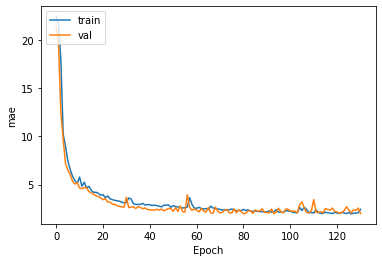

In [25]:
# 7. 학습 시각화하기
import matplotlib.pyplot as plt

plt.plot(hist.history['mae'])
plt.plot(hist.history['val_mae'])

plt.xlabel('Epoch')
plt.ylabel('mae')
plt.legend(['train', 'val'], loc = 'upper left')
plt.show()

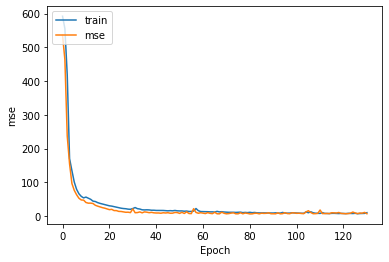

In [26]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])

plt.xlabel('Epoch')
plt.ylabel('mse')
plt.legend(['train', 'mse'], loc = 'upper left')
plt.show()

In [27]:
import numpy as np

In [28]:
## 번외 머신러닝으로 학습하기

In [29]:
from sklearn.linear_model import LinearRegression
model1 = LinearRegression()
model1.fit(X_train , y_train )
predicted = model1.predict(X_test)

from sklearn.metrics import mean_squared_error

mse = np.sqrt(mean_squared_error(predicted, y_test))
print('평균제곱근오차', mse)

# validation mse check
predicted_val = model1.predict(X_val)
mse_val = np.sqrt(mean_squared_error(predicted_val, y_val))
print('평균제곱근오차_Val', mse_val)


평균제곱근오차 5.263921344003195
평균제곱근오차_Val 3.922879908566958


In [20]:
from sklearn.ensemble import RandomForestRegressor
model2 = RandomForestRegressor()
model2.fit(X_train , y_train )

predicted2 = model2.predict(X_test)
mse_RF = np.sqrt(mean_squared_error(predicted2, y_test))
print('평균제곱근오차', mse_RF)

<ipython-input-20-c6c7f3dfba42>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model2.fit(X_train , y_train )


평균제곱근오차 4.24988042556246
